In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import numpy as np
import pandas as pd
import plotly.express as px
import nltk
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras import preprocessing, Input
import gensim
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
import re
from PIL import Image, ImageFile
#print('Tensorflow version: ', tf.__version__)
import matplotlib as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#4370  of  1135+2700 text form
df= pd.read_csv('/content/drive/MyDrive/Last_data.csv', encoding='utf-8' , delimiter=',')
df= df.fillna(method='ffill')

In [ ]:
df

,Text,Label
0,ቄቤ ወተትነው በጥቅላላ ከብት,Country
1,ጥቅምት በከሀድው ጁንታ ከተገደሉ የሰሜን የሀገር መከላከያ ሰራዊት አባላት...,Individual
2,አትሌቱ የሚኒሻ ብርሀኑ ጁላ ሚኒሻ ሰራዊት በምድር ድሮወኑ ፋኖ በታላቅ ጀ...,Country
3,የጉሙዝ ሀይል አባላት ከስራቸው እየጠፉ የገባውን በኦነግ የሰለጠውን ታጣቂ...,Non-Racist
4,ጥንቃቄ ይደረግ መከላከያ የአማራ ሀይል የአማራ ሚኒሻ መቀሌ ከተማን መቆጣ...,Regional
...,...,...
13010,ካንተ የባረ አርዮስ ዘረኛ አለደ ትግርኘ ተኔጋሪ ደካሜንተሪ የሰራው ዋልታ,Country
13011,የዘረንኘት ማሽን ዘረኝነት በውነቱ ስላቅ,Non-Racist
13012,ነቀፌታህን ጭብጥ መሰረት ባለው አድርግ ያልኩት,Individual
13013,ምድረ መሃይም ስብስብ በደንብ እናቃቸዋለን አብረን ተምረናል እንድሁም በብ...,Non-Racist


## codding

In [8]:
# Tokenize the text using Keras Tokenizer
MAX_NB_WORDS = 50000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print(len(word_index))
tokenizer

22813


In [ ]:
#word_index

In [9]:
#convert the text data in the df['Text'] column of a Pandas DataFrame df into sequences of integers.
X = tokenizer.texts_to_sequences(df['Text'].values)
#X

In [10]:
# Now you can pad the sequences
maxlen = 100
X_padded = pad_sequences(X, maxlen=maxlen, padding='post', truncating='post')

# Display the shape of the padded data tensor
print('Shape of data tensor:', X_padded.shape)

Shape of data tensor: (13015, 100)


In [11]:
#pads the sequences in X with zeros or truncates them to a maximum length of MAX_SEQUENCE_LENGTH
maxlen=100
X = pad_sequences(X, maxlen)
#X_flattened = [list(filter(lambda x: x != 0, row))[::-1] for row in X]

#X_flattened = [list(filter(lambda x: x != 0, row)) for row in X]
#number of samples and the maximum sequence length.
print('Shape of data tensor:', X.shape)

Shape of data tensor: (13015, 100)


In [12]:
#one-hot encoded representation of the labels
Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (13015, 4)


In [ ]:
Y[600]

array([1, 0, 0, 0], dtype=uint8)

In [ ]:
print(X.shape, Y.shape)


(13015, 100) (13015, 4)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11713, 100) (11713, 4)
(1302, 100) (1302, 4)


In [14]:

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.10, random_state=42)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.10, random_state=42)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_validation.shape, Y_validation.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


Training set shape: (11713, 100) (11713, 4)
Validation set shape: (1171, 100) (1171, 4)
Testing set shape: (131, 100) (131, 4)


In [15]:
#Convert the Text column of df to a list of lists/kenize
train_text_list= [str(d).split() for d in df['Text'].tolist()]
#Create a dictionary that maps each label class to a unique integer using a dictionary comprehension:
#label_dict = {label: idx for idx, label in enumerate(df['Lable'].unique())}
#label_dict = {label: (len(df['Lable'].unique()) - 1 - idx) for idx, label in enumerate(df['Lable'].unique())}
label_dict = {label: (len(df['Label'].unique()) - 1 - idx) for idx, label in enumerate(df['Label'].unique())}
label_dict['Individual'] = 1
label_dict['Regional'] = 2
label_dict['Non-Racist'] = 0
label_dict['Country'] = 3
label_dict

{'Country': 3, 'Individual': 1, 'Non-Racist': 0, 'Regional': 2}

In [16]:
#convert all clasess in to numbers
label_dict = df['Label'].map(label_dict).tolist()
#label_dict

In [ ]:
import gensim
from gensim.models import KeyedVectors

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/amharic-word2vec-300D.gz', binary=False)

In [ ]:
model.most_similar('ፋኖ')

[('ቄሮ', 0.6615514755249023),
 ('ቄሮና', 0.5949808359146118),
 ('ፍኖ', 0.5778266191482544),
 ('ፋኖና', 0.5660377144813538),
 ('ዘርማ', 0.5270305275917053),
 ('ፋኖዎች', 0.5260764360427856),
 ('ሚሊሻ', 0.5168663859367371),
 ('ፋኖን', 0.5163748860359192),
 ('ሚኒሻ', 0.5052749514579773),
 ('ፈኖ', 0.503028154373169)]

In [ ]:
#embedding
embedding_dim = 300  # Set the dimensionality of the word embeddings
max_seq_length = 100  # Set the maximum sequence length of the documents
# Create a matrix of word embeddings for the documents in text_list
X = np.zeros((len(train_text_list), max_seq_length, embedding_dim))
for i, doc in enumerate(train_text_list):
    for j, word in enumerate(doc):
        if j >= max_seq_length:
            break
        if word in model:
            X[i, j, :] = model[word]

In [ ]:
# Convert label_list to a NumPy array
y = np.array(label_dict)
y

array([3, 1, 3, ..., 1, 0, 1])

In [ ]:
!pip install matplotlib

## In small dataset experiment
4370 TEXT

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'X' is your input data and 'y' are the corresponding labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)
# Now, you have your data split into training, validation, and testing sets
# 'X_train' and 'y_train' are for training
# 'X_val' and 'y_val' are for validation
# 'X_test' and 'y_test' are for testing

Epoch 1/50
83/83 [==============================] - 90s 966ms/step - loss: 1.1356 - accuracy: 0.5209 - val_loss: 0.9544 - val_accuracy: 0.6314
Epoch 2/50
83/83 [==============================] - 89s 1s/step - loss: 0.8419 - accuracy: 0.6751 - val_loss: 0.7492 - val_accuracy: 0.7210
Epoch 3/50
83/83 [==============================] - 74s 898ms/step - loss: 0.6595 - accuracy: 0.7575 - val_loss: 0.6288 - val_accuracy: 0.7747
Epoch 4/50
83/83 [==============================] - 78s 927ms/step - loss: 0.5297 - accuracy: 0.8098 - val_loss: 0.5351 - val_accuracy: 0.8268
Epoch 5/50
83/83 [==============================] - 76s 915ms/step - loss: 0.4228 - accuracy: 0.8564 - val_loss: 0.4978 - val_accuracy: 0.8362
Epoch 6/50
83/83 [==============================] - 92s 1s/step - loss: 0.3572 - accuracy: 0.8781 - val_loss: 0.4302 - val_accuracy: 0.8677
Epoch 7/50
83/83 [==============================] - 81s 979ms/step - loss: 0.3913 - accuracy: 0.8696 - val_loss: 0.4507 - val_accuracy: 0.8720
Epoch

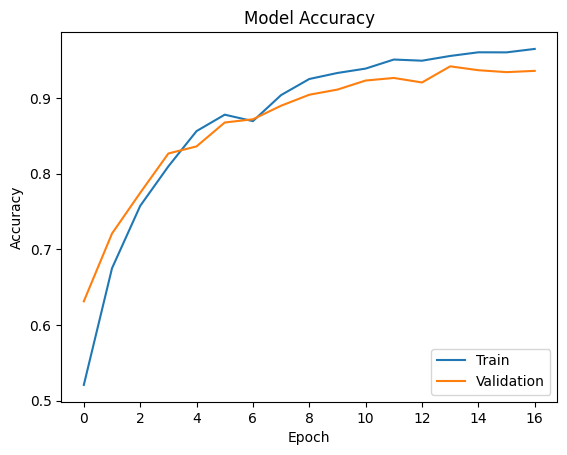

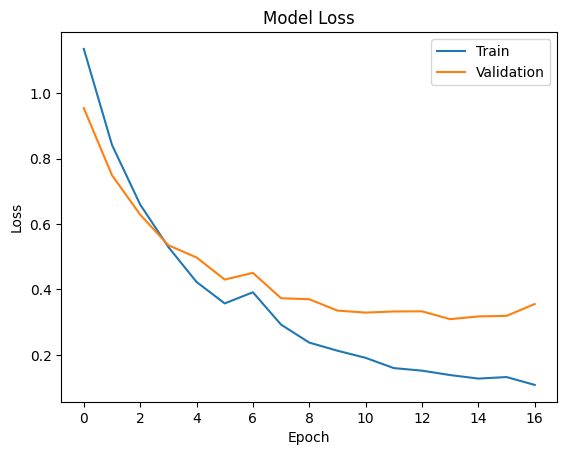

Test accuracy: 0.9293394684791565
Test loss: 0.36045390367507935


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = keras.Sequential([
    #keras.layers.LSTM(128, input_shape=(max_seq_length, embedding_dim)),
    keras.layers.Bidirectional(LSTM(128, input_shape=(max_seq_length, embedding_dim))),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64),
    keras.layers.Dense(4, activation='softmax')
])
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Fit the model to the training data
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[early_stopping])

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/100
165/165 [==============================] - 89s 509ms/step - loss: 1.0545 - accuracy: 0.5613 - val_loss: 0.8186 - val_accuracy: 0.6826
Epoch 2/100
165/165 [==============================] - 80s 487ms/step - loss: 0.7040 - accuracy: 0.7367 - val_loss: 0.5718 - val_accuracy: 0.7875
Epoch 3/100
165/165 [==============================] - 85s 515ms/step - loss: 0.5247 - accuracy: 0.8170 - val_loss: 0.4652 - val_accuracy: 0.8345
Epoch 4/100
165/165 [==============================] - 82s 499ms/step - loss: 0.4111 - accuracy: 0.8582 - val_loss: 0.3910 - val_accuracy: 0.8541
Epoch 5/100
165/165 [==============================] - 82s 500ms/step - loss: 0.3390 - accuracy: 0.8873 - val_loss: 0.3411 - val_accuracy: 0.8916
Epoch 6/100
165/165 [==============================] - 83s 501ms/step - loss: 0.2792 - accuracy: 0.9107 - val_loss: 0.2936 - val_accuracy: 0.9121
Epoch 7/100
165/165 [==============================] - 81s 491ms/step - loss: 0.2236 - accuracy: 0.9299 - val_loss: 0.2898 -

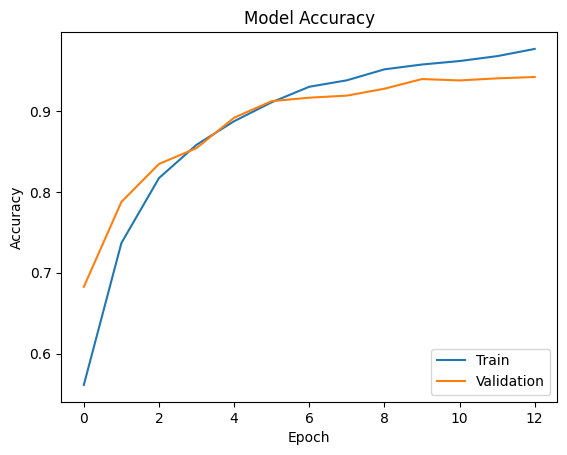

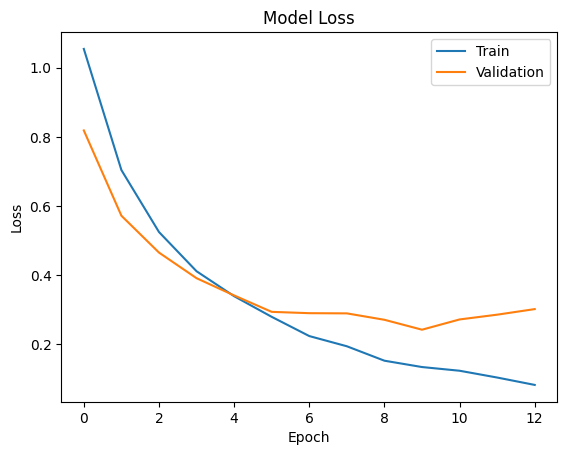

Test accuracy: 0.9331797361373901
Test loss: 0.2824387550354004


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = keras.Sequential([
    #keras.layers.LSTM(128, input_shape=(max_seq_length, embedding_dim)),
    keras.layers.Bidirectional(LSTM(128, input_shape=(max_seq_length, embedding_dim))),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64),
    keras.layers.Dense(4, activation='softmax')
])
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Fit the model to the training data
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stopping])

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

## Bi-LSTM model development

Epoch 1/50
165/165 [==============================] - 136s 748ms/step - loss: 1.0465 - accuracy: 0.5704 - val_loss: 0.8614 - val_accuracy: 0.6715
Epoch 2/50
165/165 [==============================] - 98s 595ms/step - loss: 0.7049 - accuracy: 0.7378 - val_loss: 0.6172 - val_accuracy: 0.7730
Epoch 3/50
165/165 [==============================] - 97s 587ms/step - loss: 0.5326 - accuracy: 0.8129 - val_loss: 0.5116 - val_accuracy: 0.8311
Epoch 4/50
165/165 [==============================] - 95s 577ms/step - loss: 0.4229 - accuracy: 0.8569 - val_loss: 0.4431 - val_accuracy: 0.8541
Epoch 5/50
165/165 [==============================] - 99s 599ms/step - loss: 0.3172 - accuracy: 0.8946 - val_loss: 0.3725 - val_accuracy: 0.8942
Epoch 6/50
165/165 [==============================] - 102s 619ms/step - loss: 0.2622 - accuracy: 0.9149 - val_loss: 0.3367 - val_accuracy: 0.9138
Epoch 7/50
165/165 [==============================] - 95s 574ms/step - loss: 0.2241 - accuracy: 0.9262 - val_loss: 0.3332 - val_

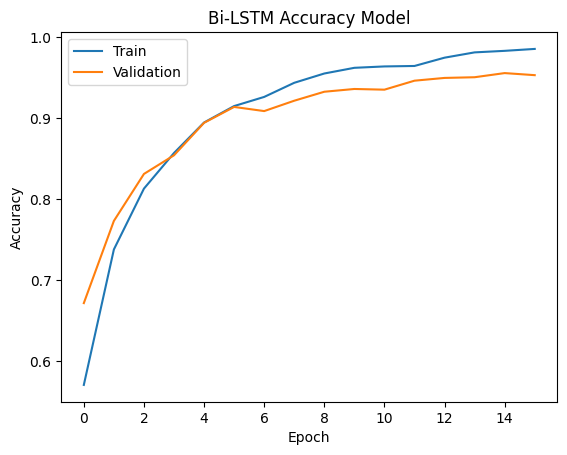

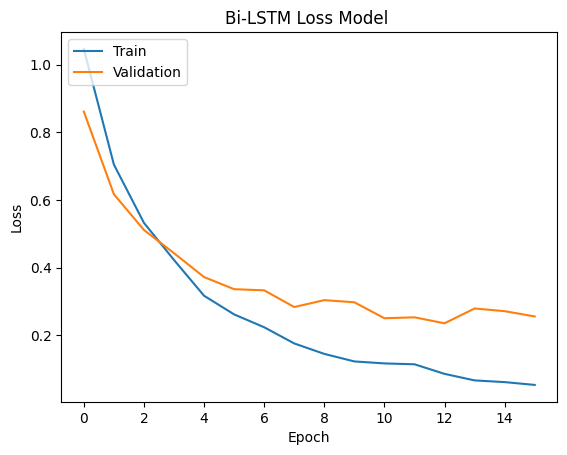

Test accuracy: 0.9347158074378967
Test loss: 0.25685811042785645


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Assuming X, y, max_seq_length, embedding_dim are defined

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Define a neural network model
model = keras.Sequential([
    keras.layers.Bidirectional(LSTM(128, input_shape=(max_seq_length, embedding_dim))),
    keras.layers.Dropout(0.1),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64),
    keras.layers.Dense(4, activation='softmax')])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model to the training data with early stopping
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stopping])

# Save the trained model
model.save("my_lstm_model.h5")

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Bi-LSTM Accuracy Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Bi-LSTM Loss Model ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


## Model

In [ ]:
#model.save("model.h5")

In [4]:
model=load_model('/content/drive/MyDrive/my_lstm_model.h5')
#define the training process of loss,optimizer and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/my_lstm_model.h5')

# Define a tokenizer (assuming you used a tokenizer during training)
tokenizer = Tokenizer()
# Load tokenizer vocabulary if available, e.g., tokenizer.word_index = saved_word_index

# Example new text data
new_texts = ["አማራ ነፍተኛ ነው", "ትግሬ ጁንታ ነው"]

# Tokenize and preprocess the new text data
sequences = tokenizer.texts_to_sequences(new_texts)
max_seq_length = 100  # Replace with the max sequence length used during training
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)

# Make predictions on the new text data
predictions = loaded_model.predict(padded_sequences)

# Assuming predictions are one-hot encoded, convert them to class labels
predicted_labels = [np.argmax(prediction) for prediction in predictions]

# Print the predicted class labels
print("Predicted Labels:", predicted_labels)

## confiution matrics

Epoch 1/5
165/165 [==============================] - 148s 764ms/step - loss: 1.0600 - accuracy: 0.5570 - val_loss: 0.8345 - val_accuracy: 0.6800
Epoch 2/5
165/165 [==============================] - 98s 596ms/step - loss: 0.7214 - accuracy: 0.7350 - val_loss: 0.6233 - val_accuracy: 0.7628
Epoch 3/5
165/165 [==============================] - 98s 591ms/step - loss: 0.5429 - accuracy: 0.8072 - val_loss: 0.5548 - val_accuracy: 0.8038
Epoch 4/5
165/165 [==============================] - 96s 580ms/step - loss: 0.4862 - accuracy: 0.8262 - val_loss: 0.4234 - val_accuracy: 0.8635
Epoch 5/5
41/41 [==============================] - 7s 128ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       343
           1       0.94      0.84      0.89       345
           2       0.87      0.90      0.89       295
           3       0.77      0.96      0.85       319

    accuracy                           0.86      1302
   macro 

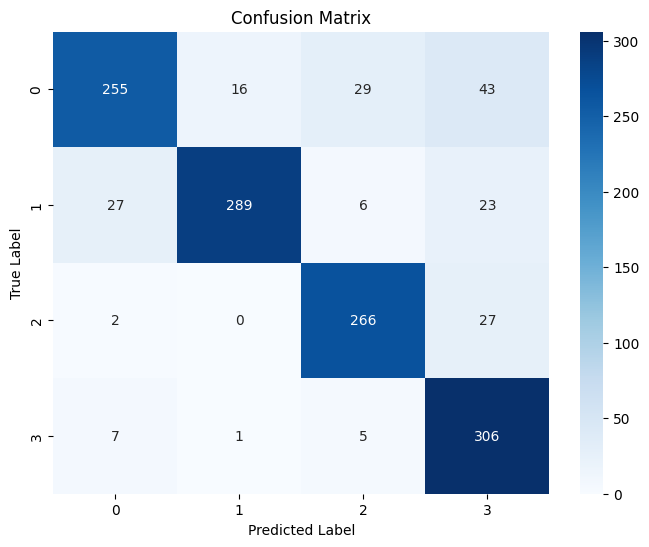

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Add this import statement for Seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras

# Define and compile the Bi-LSTM model
bi_lstm_model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(128, input_shape=(maxlen, embedding_dim))),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

bi_lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, label_dict, test_size=0.10, random_state=42)

# Encode labels for model evaluation
label_encoder = LabelEncoder()
encoded_labels_train = label_encoder.fit_transform(Y_train)
encoded_labels_test = label_encoder.transform(Y_test)

# Train the Bi-LSTM model
history = bi_lstm_model.fit(X_train, encoded_labels_train, epochs=5, batch_size=64, validation_split=0.1)

# Make predictions on the test set
predictions = bi_lstm_model.predict(X_test)

# Decode predictions to get the predicted labels
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Print the classification report
print("Classification Report:")
print(classification_report(encoded_labels_test, decoded_predictions))

# Display the confusion matrix
conf_mat = confusion_matrix(encoded_labels_test, decoded_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Epoch 1/20
165/165 [==============================] - 116s 651ms/step - loss: 1.0771 - accuracy: 0.5547 - val_loss: 0.8624 - val_accuracy: 0.6689
Epoch 2/20
165/165 [==============================] - 108s 657ms/step - loss: 0.7361 - accuracy: 0.7262 - val_loss: 0.7305 - val_accuracy: 0.7449
Epoch 3/20
165/165 [==============================] - 109s 661ms/step - loss: 0.5516 - accuracy: 0.7988 - val_loss: 0.5504 - val_accuracy: 0.7986
Epoch 4/20
165/165 [==============================] - 105s 637ms/step - loss: 0.4450 - accuracy: 0.8471 - val_loss: 0.4329 - val_accuracy: 0.8541
Epoch 5/20
165/165 [==============================] - 110s 669ms/step - loss: 0.3502 - accuracy: 0.8835 - val_loss: 0.4062 - val_accuracy: 0.8737
Epoch 6/20
165/165 [==============================] - 106s 643ms/step - loss: 0.2875 - accuracy: 0.9076 - val_loss: 0.3532 - val_accuracy: 0.8874
Epoch 7/20
165/165 [==============================] - 105s 639ms/step - loss: 0.2330 - accuracy: 0.9266 - val_loss: 0.2939 -

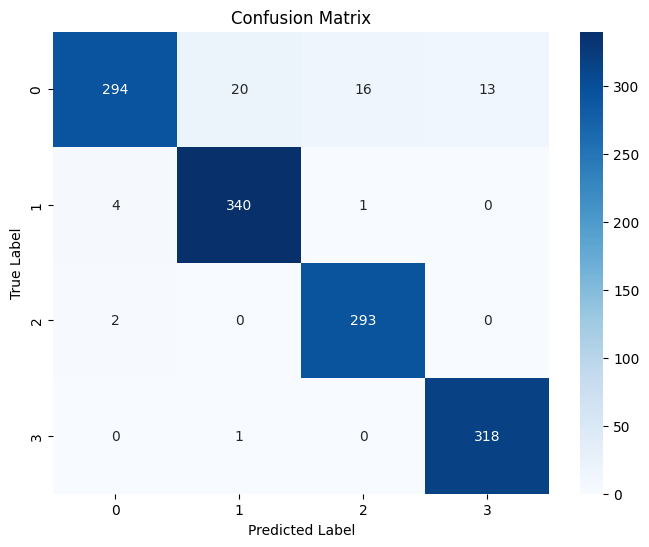

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Add this import statement for Seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras

# Define and compile the Bi-LSTM model
bi_lstm_model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(128, input_shape=(maxlen, embedding_dim))),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

bi_lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, label_dict, test_size=0.10, random_state=42)

# Encode labels for model evaluation
label_encoder = LabelEncoder()
encoded_labels_train = label_encoder.fit_transform(Y_train)
encoded_labels_test = label_encoder.transform(Y_test)

# Train the Bi-LSTM model
history = bi_lstm_model.fit(X_train, encoded_labels_train, epochs=20, batch_size=64, validation_split=0.1)

# Make predictions on the test set
predictions = bi_lstm_model.predict(X_test)

# Decode predictions to get the predicted labels
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Print the classification report
print("Classification Report:")
print(classification_report(encoded_labels_test, decoded_predictions))

# Display the confusion matrix
conf_mat = confusion_matrix(encoded_labels_test, decoded_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## model performance report from

The classification report provides metrics such as precision, recall, and F1-score for each class in your model's predictions. Let's interpret the results based on the provided report:

Class 0:

Precision: 0.24
Recall: 0.98
F1-score: 0.39
Support: 319
Interpretation: The model has low precision but high recall for class 0. This means that among the instances predicted as class 0, only 24% were actually class 0, but the model identified 98% of the true class 0 instances.

Class 1:

Precision: 0.78
Recall: 0.02
F1-score: 0.04
Support: 345
Interpretation: The model has high precision but low recall for class 1. This indicates that when the model predicts class 1, it is likely to be correct (78% of the time), but it misses many instances of true class 1 (only 2% recall).

Class 2:

Precision: 0.00
Recall: 0.00
F1-score: 0.00
Support: 343
Interpretation: The model has poor performance for class 2, with precision, recall, and F1-score all being 0. This suggests that the model did not correctly predict any instances of class 2.

Class 3:

Precision: 0.00
Recall: 0.00
F1-score: 0.00
Support: 295
Interpretation: Similar to class 2, the model did not correctly predict any instances of class 3, resulting in poor precision, recall, and F1-score.

Overall Metrics:

Accuracy: 0.25 (25%)
Macro Average F1-score: 0.11
Weighted Average F1-score: 0.11
General Interpretation:

The overall accuracy of the model is quite low, indicating that it struggles to correctly classify instances.
The macro and weighted average F1-scores are also low, suggesting that the model's performance is poor across all classes.
Recommendations:

Further investigate and potentially balance the class distribution in the training data.
Consider fine-tuning the model hyperparameters or exploring more complex models.
Analyze misclassified instances and consider additional data preprocessing steps or feature engineering.
These results indicate that the model is facing challenges in distinguishing between different classes, and further refinement may be needed to improve its performance.

Training set shape: (11713, 100, 300) (11713, 4)
Testing set shape: (1302, 100, 300) (1302, 4)
Epoch 1/20
165/165 [==============================] - 105s 604ms/step - loss: 1.0577 - accuracy: 0.5593 - val_loss: 0.8415 - val_accuracy: 0.6655
Epoch 2/20
165/165 [==============================] - 103s 614ms/step - loss: 0.7116 - accuracy: 0.7313 - val_loss: 0.6406 - val_accuracy: 0.7466
Epoch 3/20
165/165 [==============================] - 96s 581ms/step - loss: 0.5618 - accuracy: 0.7976 - val_loss: 0.5709 - val_accuracy: 0.7816
Epoch 4/20
165/165 [==============================] - 99s 596ms/step - loss: 0.4250 - accuracy: 0.8540 - val_loss: 0.4514 - val_accuracy: 0.8532
Epoch 5/20
165/165 [==============================] - 97s 585ms/step - loss: 0.3429 - accuracy: 0.8878 - val_loss: 0.4037 - val_accuracy: 0.8643
Epoch 6/20
165/165 [==============================] - 97s 584ms/step - loss: 0.2913 - accuracy: 0.9076 - val_loss: 0.3223 - val_accuracy: 0.9053
Epoch 7/20
165/165 [=============

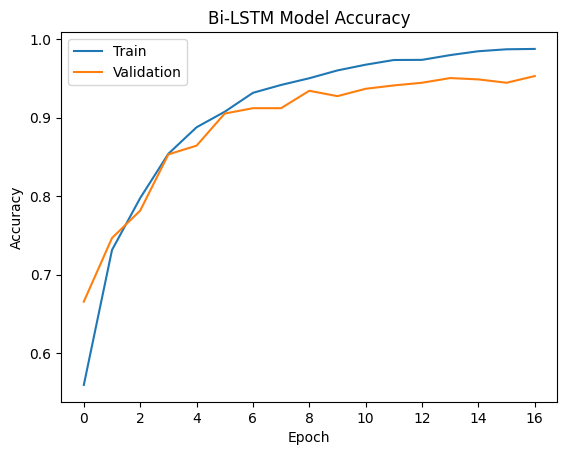

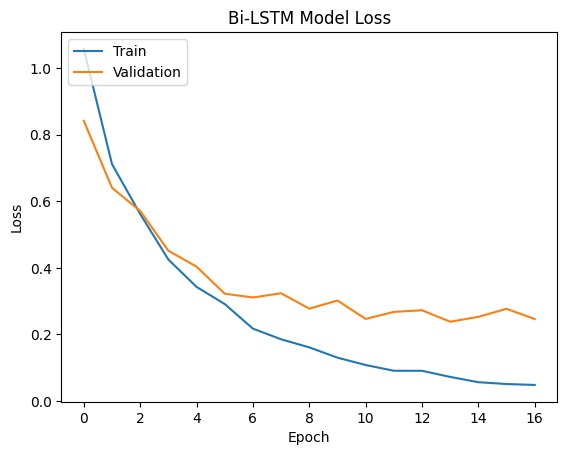

In [ ]:
# Define and compile the Bi-LSTM model
bi_lstm_model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(128, input_shape=(maxlen, embedding_dim))),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])
bi_lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Check the dimensions after the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

# Encode labels for model evaluation
label_encoder = LabelEncoder()
encoded_labels_train = label_encoder.fit_transform(np.argmax(Y_train, axis=1))
encoded_labels_test = label_encoder.transform(np.argmax(Y_test, axis=1))
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the Bi-LSTM model
history = bi_lstm_model.fit(X_train, encoded_labels_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Make predictions on the test set
predictions = bi_lstm_model.predict(X_test)

# Decode predictions to get the predicted labels
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Print the classification report
print("Classification Report:")
print(classification_report(encoded_labels_test, decoded_predictions))

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Bi-LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Bi-LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Define a neural network model
model = keras.Sequential([
    keras.layers.LSTM(128, input_shape=(max_seq_length, embedding_dim)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming X_train, Y_train, X_test, Y_test are already defined

# Define and compile the Bi-LSTM model
bi_lstm_model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(128, input_shape=(maxlen, embedding_dim))),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

bi_lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Encode labels for model evaluation
label_encoder = LabelEncoder()
encoded_labels_train = label_encoder.fit_transform(np.argmax(Y_train, axis=1))
encoded_labels_test = label_encoder.transform(np.argmax(Y_test, axis=1))

# Train the Bi-LSTM model
history = bi_lstm_model.fit(X_train, encoded_labels_train, epochs=5, batch_size=64, validation_split=0.1)

# Make predictions on the test set
predictions = bi_lstm_model.predict(X_test)

# Decode predictions to get the predicted labels
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Print the classification report
class_report = classification_report(encoded_labels_test, decoded_predictions, output_dict=True)
print("Classification Report:")
print(classification_report(encoded_labels_test, decoded_predictions))

# Extract metrics for plotting
accuracy = class_report['accuracy']
precision = [class_report[str(i)]['precision'] for i in range(4)]
recall = [class_report[str(i)]['recall'] for i in range(4)]
f1_score = [class_report[str(i)]['f1-score'] for i in range(4)]

# Bar chart
labels = ['Non-Racist', 'Individual', 'Regional', 'Country']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## AUC-ROC

In [ ]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# Assuming 'df' is your DataFrame containing 'Text' and 'Label' columns
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Your previous preprocessing code...

# LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=maxlen))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Fit the model to the training data
model_lstm.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stopping])
# Predictions on test set
Y_pred_lstm = model_lstm.predict(X_test)

# AUC-ROC Curve for LSTM
roc_auc_lstm = roc_auc_score(Y_test, Y_pred_lstm)

# Bi-LSTM model
from tensorflow.keras.layers import Bidirectional

model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=maxlen))
model_bilstm.add(Bidirectional(LSTM(100)))
model_bilstm.add(Dense(1, activation='sigmoid'))
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bi-LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Fit the model to the training data
model_bilstm.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stopping])
# Predictions on test set
Y_pred_bilstm = model_bilstm.predict(X_test)

# AUC-ROC Curve for Bi-LSTM
roc_auc_bilstm = roc_auc_score(Y_test, Y_pred_bilstm)

# Plot AUC-ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_lstm, tpr_lstm, _ = roc_curve(Y_test, Y_pred_lstm)
fpr_bilstm, tpr_bilstm, _ = roc_curve(Y_test, Y_pred_bilstm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_bilstm, tpr_bilstm, label=f'Bi-LSTM (AUC = {roc_auc_bilstm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()